In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cell_images']


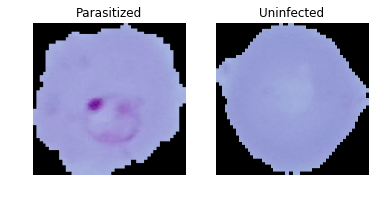

In [2]:
# for image read i used opencv to resize and east read png files 
data1 = cv2.imread("../input/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png") #parasitized malari cell path and call one image
data1 = cv2.resize(data1,(160,160)) 
plt.subplot(1,2,1)
plt.imshow(data1)
plt.axis("off")
plt.title("Parasitized")
data1 = cv2.imread("../input/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png") #uninfected malari cell path and call one image
data1 = cv2.resize(data1,(160,160))
plt.subplot(1,2,2)
plt.imshow(data1)
plt.axis("off")
plt.title("Uninfected")
plt.show()

In [3]:
x = list() #create x data
y = list() # create y data
for i in os.listdir("../input/cell_images/cell_images/Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "../input/cell_images/cell_images/Parasitized/"+i # create path
        img = plt.imread(path) # and read created path
        img = cv2.resize(img,(40,40)) # resize image for lower processing power
        x.append(img) # append image to x data
        y.append(1) 
for i in os.listdir("../input/cell_images/cell_images/Uninfected/"):
    if ".png" in i:
        path = "../input/cell_images/cell_images/Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(0)
x = np.array(x)  

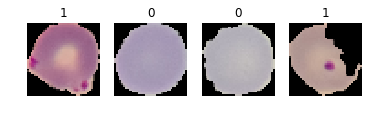

In [4]:
# create 4 subplots and plot 4 random image 
plt.subplot(1,4,1)
plt.imshow(x[2000]) # image 1
plt.title(y[2000])
plt.axis("off")
plt.subplot(1,4,2) # image 2
plt.imshow(x[22000])
plt.title(y[22000])
plt.axis("off")
plt.subplot(1,4,3) #image 3
plt.imshow(x[20000])
plt.title(y[20000])
plt.axis("off")
plt.subplot(1,4,4) #image 4 
plt.imshow(x[200])
plt.title(y[200])
plt.axis("off")
plt.show()

In [5]:
#reshapeing data
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
x = x**8

In [6]:
# i used sklearn modul for splitting process
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

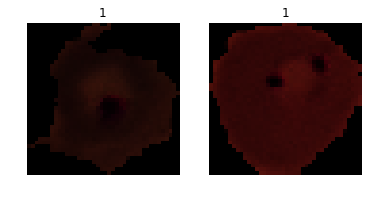

In [7]:
img1 =x_train[970].reshape(40,40,3) #reshape for normal image shape
img2 =x_train[100].reshape(40,40,3)
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis("off")
plt.title(y_train[900])
plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis("off")
plt.title(y_train[100])
plt.show()

In [8]:
#import LogisticRegression and fit with out datas
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Test my Logistic Regression Model
print("Logistic Regression Accuracy : {0:.2f}%".format(100 * lr.score(x_test,y_test)))

Logistic Regression Accuracy : 67.22%


In [10]:
#import modules i will use
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
# build our model
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1])) # firt hidden layer 
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # last layer
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier # return our model

Using TensorFlow backend.


In [11]:
model = build_classifier()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                307264    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 314,593
Trainable params: 314,593
Non-trainable params: 0
_________________________________________________________________


In [12]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
history = classifier.fit(x_train,y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
22046/22046 [==============================] - 6s 276us/step - loss: 0.6400 - acc: 0.6280
Epoch 2/100
22046/22046 [==============================] - 3s 132us/step - loss: 0.5926 - acc: 0.6804
Epoch 3/100
22046/22046 [==============================] - 3s 126us/step - loss: 0.5740 - acc: 0.6897
Epoch 4/100
22046/22046 [==============================] - 3s 121us/step - loss: 0.5589 - acc: 0.7009
Epoch 5/100
22046/22046 [==============================] - 3s 138us/step - loss: 0.5453 - acc: 0.7129
Epoch 6/100
22046/22046 [==============================] - 3s 150us/step - loss: 0.5319 - acc: 0.7258
Epoch 7/100
22046/22046 [==============================] - 3s 122us/step - loss: 0.5181 - acc: 0.7340
Epoch 8/100
22046/22046 [==============================] - 3s 119us/step - loss: 0.5082 - acc: 0.7418
Epoch 9/100
22046/22046 [==============================] - 3s 115us/step - loss: 0.4936 - acc: 0.7512
Epoch 10/100
22046/22046 [========

In [13]:
history.history['acc']
history.history['loss']
x_ = np.array(range(len(history.history['loss'])))
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'],
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['acc'],
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [14]:
classifier.score(x_test,y_test)

5512/5512 [==============================] - 0s 55us/step


0.7119013062409288